In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import pylab as pl
from sklearn import preprocessing
from sklearn import ensemble

In [2]:
data = pd.read_csv("data.csv")
df = pd.DataFrame(data) # Converting data to Panda DataFrame
df.describe() #gives statistics about the columns of the dataframe

,Input,instructionCount,ilp32,ilp256,ilp2048,ilp65536,memops,ctrlops,intops,flops,...,lbdiv16,lbdiv32,lbdiv64,lbdiv128,lbdiv256,lbdiv512,lbdiv1024,probsize,CPU Time,GPU Time
count,8.300000e+01,8.300000e+01,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,...,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,8.300000e+01,83.000000,83.000000
mean,3.523174e+07,1.076400e+10,4.852934,10.607886,74.282014,563.371791,0.712525,0.120555,0.740644,0.178620,...,1.062817e-03,1.741444e-03,2.145406e-03,2.501448e-03,3.088642e-03,2.871509e+01,5.409485e-03,4.152963e+05,22.571006,22.765411
std,1.514525e+08,2.194167e+10,1.591059,8.206145,148.368694,1774.465515,0.105899,0.074426,0.113245,0.140009,...,3.909190e-03,6.358476e-03,7.161677e-03,7.357479e-03,7.849943e-03,2.615678e+02,1.167974e-02,1.335055e+06,34.422967,63.084143
min,2.560000e+02,2.611762e+06,1.442210,1.918572,1.980879,2.570037,0.461629,0.007327,0.518805,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.016934,0.124418
25%,1.368000e+03,4.881504e+08,4.000063,4.458856,5.007727,5.773378,0.626536,0.072202,0.620232,0.050000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,2.773428,0.760976
50%,2.000000e+04,2.239865e+09,5.000074,9.059592,9.687678,14.166241,0.718750,0.100001,0.777779,0.185172,...,6.560000e-08,1.310000e-07,2.630000e-07,4.750000e-07,6.680000e-07,7.420000e-07,8.350000e-07,2.970000e+02,10.475384,3.324654
75%,1.733445e+05,8.364610e+09,6.141176,13.489561,33.253687,255.673730,0.808426,0.145731,0.831889,0.245617,...,1.185536e-04,1.929116e-04,2.952818e-04,3.926128e-04,3.956721e-04,5.597367e-04,6.199144e-04,2.469500e+03,28.668817,14.161183
max,1.000000e+09,1.374371e+11,7.197260,37.911765,534.000000,9023.000000,0.890129,0.307693,0.886846,0.523809,...,2.225168e-02,3.323731e-02,3.596328e-02,3.596328e-02,3.596328e-02,2.383000e+03,3.705571e-02,6.944444e+06,169.931417,412.397738


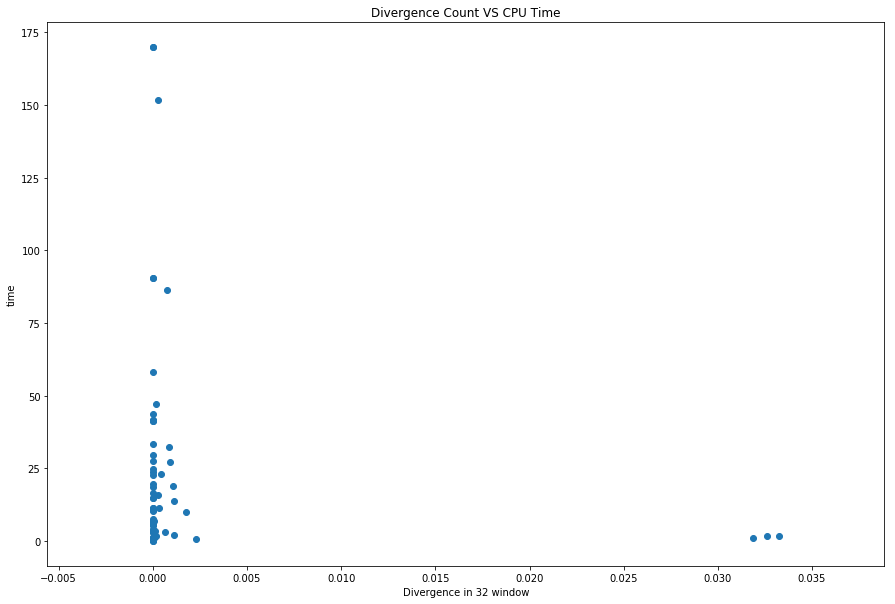

In [3]:
df_Y = df[df['Class'] == "Y"]

plt.figure(figsize=(15,10))
plt.scatter(df_Y['lbdiv32'], df_Y['CPU Time']) 
plt.title('Divergence Count VS CPU Time')
plt.xlabel('Divergence in 32 window')
plt.ylabel('time')
plt.show()

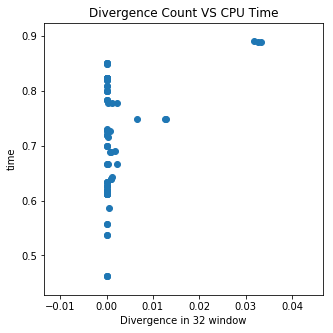

In [4]:
#df_Y = df[df['Class'] == "Y"]
#used to get an idea of distribution values of features
plt.figure(figsize=(5,5))
plt.scatter(df['lbdiv32'], df['memops']) 
plt.title('Divergence Count VS CPU Time')
plt.xlabel('Divergence in 32 window')
plt.ylabel('time')
plt.show()

In [5]:
yes = len(data[data.Class == "Y"])
No = len(data[data.Class == "N"])

print yes
print No

66
17


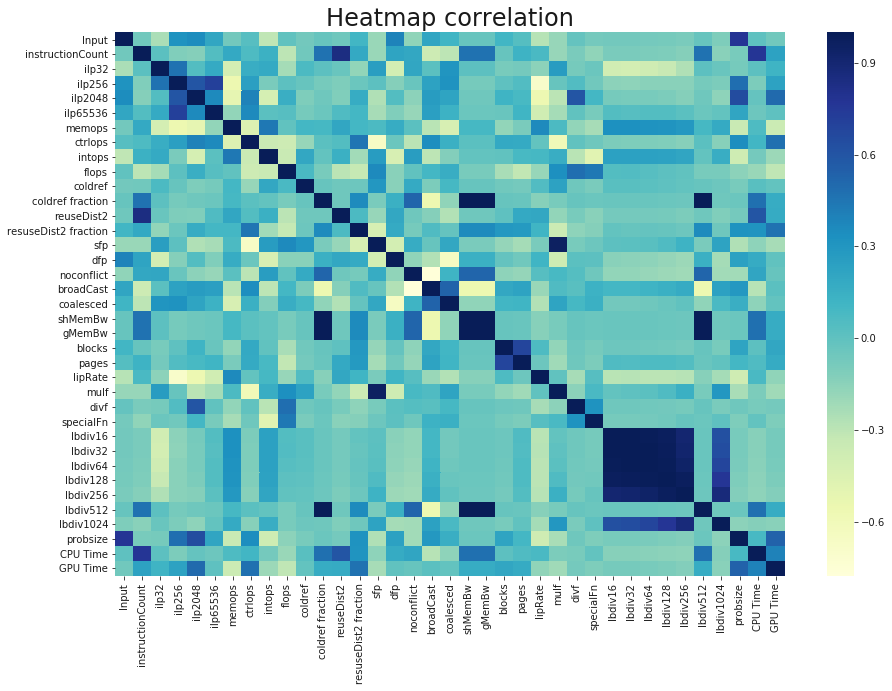

In [6]:
df_corr = df.corr()
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") #Get an idea of correlation between the features
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

#generally it is good to remove higly correlated data. One reason is higly correlated data will effect the PCA. so that 
#some features will be overemphasized while some features will be underemphasized.
#one way to interpret is removing redundant features can result in a more simple model with respect to Occam's razor


## Datapreprocessing

#TODO check for gradient boosting classifier 
#class imbalance is a problem in a classification scenario so that we need to balance the classes
#recursive feature selection can be done
#due to our natures of the addressed problem we think it is profitable to use a ensemble learning technique with majority 
#voting to address our problem
#imputing missing values
#normalizing or standardizing features
#balancing classes
